# Basic Explanation

It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, you have 3 different outputs:

    1. No readmission;
    2. A readmission in less than 30 days 
    3. A readmission in more than 30 days 


## Motivation

Motivation behind this solution is following:
    
    1. To create a model to predict readmission, so that the patient can get a better treatment.
    2. Diabetes is a world-wide problem, and we should try to understand the cause & factors of Diabetes.
    3. This is a try to implement modelling as well as explanation of the models.
    
## Here we will be using ML Interpretation using
        1. LIME
        2. ELI5
        3. SHAP
    
##### Note: This might not be a perfect solution, as this has been created with limited time and effort, so please don't use it for medical purposes, but yes this can be used for educational purposes.

# Data Exploration

In [1]:
import pandas as pd
import numpy as np

# Warnings
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score

# model explainers
import lime
from lime.lime_tabular import LimeTabularExplainer
import eli5
from eli5.sklearn import PermutationImportance
import shap
from shap import TreeExplainer,KernelExplainer,LinearExplainer
shap.initjs()

import time
import datetime
import platform
start = time.time()

warnings.simplefilter('ignore')

Using TensorFlow backend.


In [2]:
# Create table for missing data in the given dataframe.
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [3]:
dataset = pd.read_csv('data/diabetic_data.csv')

In [4]:
# Looking at the dataset
dataset.head().T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                 None       None   
A1Cresult                                     None       None   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4  
encounter_id                        64410     500364      16680  
patient_nbr                      86047875   82442376   42519267  
race                      AfricanAmerican  Caucasian  Caucasian  
gender                             Female       Male       Male  
age                               [20-30)    [30-40)    [40-50)  
weight                                  ?          ?          ?  
admission_type_id                       1          1          1  
discharge_disposition_id                1          1          1  
admission_source_id                     7          7          7  
time_in_hospital                        2          2          1  
payer_c

In [5]:
dataset.describe(include = 'all').T

count unique        top    freq         mean  \
encounter_id              101766    NaN        NaN     NaN  1.65202e+08   
patient_nbr               101766    NaN        NaN     NaN  5.43304e+07   
race                      101766      6  Caucasian   76099          NaN   
gender                    101766      3     Female   54708          NaN   
age                       101766     10    [70-80)   26068          NaN   
weight                    101766     10          ?   98569          NaN   
admission_type_id         101766    NaN        NaN     NaN      2.02401   
discharge_disposition_id  101766    NaN        NaN     NaN      3.71564   
admission_source_id       101766    NaN        NaN     NaN      5.75444   
time_in_hospital          101766    NaN        NaN     NaN      4.39599   
payer_code                101766     18          ?   40256          NaN   
medical_specialty         101766     73          ?   49949          NaN   
num_lab_procedures        101766    NaN        NaN     NaN      43.0956   
num_procedures            101766    NaN        NaN     NaN      1.33973   
num_medications           101766    NaN        NaN     NaN      16.0218   
number_outpatient         101766    NaN        NaN     NaN     0.369357   
number_emergency          101766    NaN        NaN     NaN     0.197836   
number_inpatient          101766    NaN        NaN     NaN     0.635566   
diag_1                    101766    717        428    6862          NaN   
diag_2                    101766    749        276    6752          NaN   
diag_3                    101766    790        250   11555          NaN   
number_diagnoses          101766    NaN        NaN     NaN      7.42261   
max_glu_serum             101766      4       None   96420          NaN   
A1Cresult                 101766      4       None   84748          NaN   
metformin                 101766      4         No   81778          NaN   
repaglinide               101766      4         No  100227          NaN   
nateglinide               101766      4         No  101063          NaN   
chlorpropamide            101766      4         No  101680          NaN   
glimepiride               101766      4         No   96575          NaN   
acetohexamide             101766      2         No  101765          NaN   
glipizide                 101766      4         No   89080          NaN   
glyburide                 101766      4         No   91116          NaN   
tolbutamide               101766      2         No  101743          NaN   
pioglitazone              101766      4         No   94438          NaN   
rosiglitazone             101766      4         No   95401          NaN   
acarbose                  101766      4         No  101458          NaN   
miglitol                  101766      4         No  101728          NaN   
troglitazone              101766      2         No  101763          NaN   
tolazamide                101766      3         No  101727          NaN   
examide                   101766      1         No  101766          NaN   
citoglipton               101766      1         No  101766          NaN   
insulin                   101766      4         No   47383          NaN   
glyburide-metformin       101766      4         No  101060          NaN   
glipizide-metformin       101766      2         No  101753          NaN   
glimepiride-pioglitazone  101766      2         No  101765          NaN   
metformin-rosiglitazone   101766      2         No  101764          NaN   
metformin-pioglitazone    101766      2         No  101765          NaN   
change                    101766      2         No   54755          NaN   
diabetesMed               101766      2        Yes   78363          NaN   
readmitted                101766      3         NO   54864          NaN   

                                  std    min          25%          50%  \
encounter_id               1.0264e+08  12522  8.49612e+07  1.52389e+08   
patient_nbr               3.86964e+07    135  2.34132

In [6]:
dataset.replace('?',np.nan,inplace=True)
draw_missing_data_table(dataset)

Total   Percent
weight                    98569  0.968585
medical_specialty         49949  0.490822
payer_code                40256  0.395574
race                       2273  0.022336
diag_3                     1423  0.013983
diag_2                      358  0.003518
diag_1                       21  0.000206
num_procedures                0  0.000000
max_glu_serum                 0  0.000000
number_diagnoses              0  0.000000
number_inpatient              0  0.000000
number_emergency              0  0.000000
number_outpatient             0  0.000000
num_medications               0  0.000000
readmitted                    0  0.000000
num_lab_procedures            0  0.000000
diabetesMed                   0  0.000000
time_in_hospital              0  0.000000
admission_source_id           0  0.000000
discharge_disposition_id      0  0.000000
admission_type_id             0  0.000000
age                           0  0.000000
gender                        0  0.000000
patient_nbr                   0  0.000000
A1Cresult                     0  0.000000
metformin                     0  0.000000
repaglinide                   0  0.000000
nateglinide                   0  0.000000
change                        0  0.000000
metformin-pioglitazone        0  0.000000
metformin-rosiglitazone       0  0.000000
glimepiride-pioglitazone      0  0.000000
glipizide-metformin           0  0.000000
glyburide-metformin           0  0.000000
insulin                       0  0.000000
citoglipton                   0  0.000000
examide                       0  0.000000
tolazamide                    0  0.000000
troglitazone                  0  0.000000
miglitol                      0  0.000000
acarbose                      0  0.000000
rosiglitazone                 0  0.000000
pioglitazone                  0  0.000000
tolbutamide                   0  0.000000
glyburide                     0  0.000000
glipizide                     0  0.000000
acetohexamide                 0  0.000000
glimepiride                   0  0.000000
chlorpropamide                0  0.000000
encounter_id                  0  0.000000

### Feature Creation

#### Dropping following columns
    1. Columns that have high missing values
    2. ID related columns
#### Doing following transformations:
    1. Fill Unknown for empty Race
    2. Droppong rows that have NULL values
#### Performing Feature Encoding

In [7]:

dataset.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
# dropping columns related to IDs
dataset.drop(['encounter_id','patient_nbr','admission_type_id',
         'discharge_disposition_id','admission_source_id'],axis=1,inplace=True)

In [8]:
dataset['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [9]:
dataset['race'].unique()
dataset['race'] = dataset['race'].fillna('Unknown')

In [10]:
dataset['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Unknown', 'Other', 'Asian',
       'Hispanic'], dtype=object)

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset['readmitted'] = dataset['readmitted'].apply(lambda x: 1 if x == 'NO' else 0)

In [13]:
import numpy as np
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def feature_encoding(df, label):
    
    cat_cols = list(df.select_dtypes('object').columns)
    
    for col in cat_cols:
        features_encoded = pd.get_dummies(df[col], prefix=col + '_is')
        df = df.join(features_encoded)
        print('Encoded column {}'.format(col))
        df.drop(columns=[col], inplace=True)
    
    total_columns = list(dataset.columns.values)
    continuous_features = [x for x in total_columns if x not in cat_cols]
    continuous_features.remove(label)
    
    for col in continuous_features:
        transf = df[col].values.reshape(-1,1)
        scaler = preprocessing.StandardScaler().fit(transf)
        df[col] = scaler.transform(transf)
    
    cols = list(df.columns.values)
    df = df[cols]
    
    return df

In [14]:
feature_dataset = feature_encoding(dataset, 'readmitted')

Encoded column race
Encoded column gender
Encoded column age
Encoded column diag_1
Encoded column diag_2
Encoded column diag_3
Encoded column max_glu_serum
Encoded column A1Cresult
Encoded column metformin
Encoded column repaglinide
Encoded column nateglinide
Encoded column chlorpropamide
Encoded column glimepiride
Encoded column acetohexamide
Encoded column glipizide
Encoded column glyburide
Encoded column tolbutamide
Encoded column pioglitazone
Encoded column rosiglitazone
Encoded column acarbose
Encoded column miglitol
Encoded column troglitazone
Encoded column tolazamide
Encoded column examide
Encoded column citoglipton
Encoded column insulin
Encoded column glyburide-metformin
Encoded column glipizide-metformin
Encoded column glimepiride-pioglitazone
Encoded column metformin-rosiglitazone
Encoded column metformin-pioglitazone
Encoded column change
Encoded column diabetesMed


In [15]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


training_dataset = feature_dataset.copy()

y_train=feature_dataset[['readmitted']]
X_train=feature_dataset.drop(['readmitted'],axis=1)

### Apply Feature Selection

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) 
# remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

feature_sel_model.get_support()

feature_list = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(feature_list)))

print(feature_list)

total features: 2357
selected features: 44
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'race_is_AfricanAmerican', 'race_is_Caucasian',
       'race_is_Unknown', 'gender_is_Female', 'age_is_[60-70)',
       'age_is_[70-80)', 'age_is_[80-90)', 'age_is_[90-100)',
       'diag_1_is_250.6', 'diag_1_is_428', 'diag_1_is_491', 'diag_1_is_493',
       'diag_2_is_250', 'diag_2_is_401', 'diag_2_is_403', 'diag_2_is_411',
       'diag_2_is_428', 'diag_2_is_496', 'diag_2_is_518', 'diag_2_is_585',
       'diag_2_is_707', 'diag_3_is_250', 'diag_3_is_250.6', 'diag_3_is_276',
       'diag_3_is_401', 'diag_3_is_403', 'diag_3_is_428', 'A1Cresult_is_None',
       'A1Cresult_is_Norm', 'metformin_is_No', 'glipizide_is_No',
       'pioglitazone_is_No', 'rosiglitazone_is_Steady', 'insulin_is_Down',
       'insulin_is_Steady', 'change_is_Ch', 'diabetesMed_is_No'],
      dtype='object')


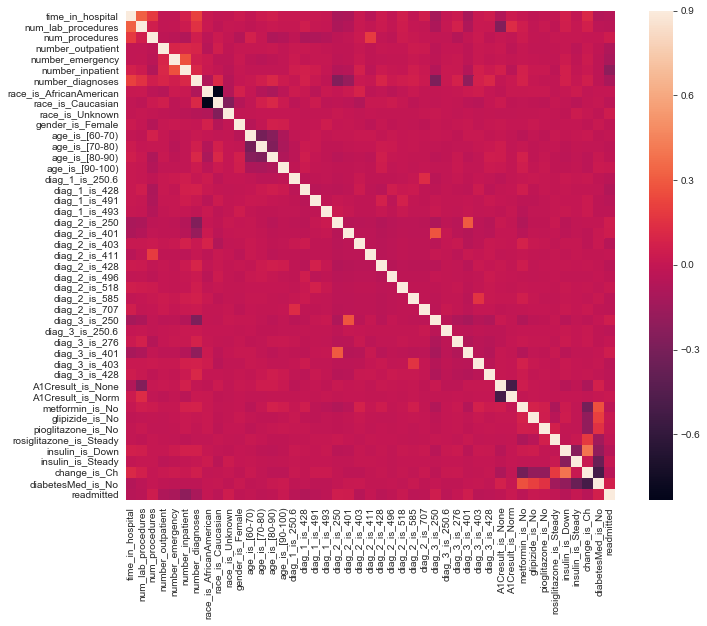

In [16]:
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

color = sns.color_palette()
sns.set_style('darkgrid')


corrmat = training_dataset[list(feature_list) + ['readmitted']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [17]:
list(feature_list) + ['readmitted']

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race_is_AfricanAmerican',
 'race_is_Caucasian',
 'race_is_Unknown',
 'gender_is_Female',
 'age_is_[60-70)',
 'age_is_[70-80)',
 'age_is_[80-90)',
 'age_is_[90-100)',
 'diag_1_is_250.6',
 'diag_1_is_428',
 'diag_1_is_491',
 'diag_1_is_493',
 'diag_2_is_250',
 'diag_2_is_401',
 'diag_2_is_403',
 'diag_2_is_411',
 'diag_2_is_428',
 'diag_2_is_496',
 'diag_2_is_518',
 'diag_2_is_585',
 'diag_2_is_707',
 'diag_3_is_250',
 'diag_3_is_250.6',
 'diag_3_is_276',
 'diag_3_is_401',
 'diag_3_is_403',
 'diag_3_is_428',
 'A1Cresult_is_None',
 'A1Cresult_is_Norm',
 'metformin_is_No',
 'glipizide_is_No',
 'pioglitazone_is_No',
 'rosiglitazone_is_Steady',
 'insulin_is_Down',
 'insulin_is_Steady',
 'change_is_Ch',
 'diabetesMed_is_No',
 'readmitted']

# Training / Test Split
(75%/25%)

In [18]:
X = feature_dataset.drop('readmitted',axis=1)[list(feature_list)]
y = feature_dataset['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((75183, 44), (25061, 44))

In [19]:
list(X_train.columns.values)

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race_is_AfricanAmerican',
 'race_is_Caucasian',
 'race_is_Unknown',
 'gender_is_Female',
 'age_is_[60-70)',
 'age_is_[70-80)',
 'age_is_[80-90)',
 'age_is_[90-100)',
 'diag_1_is_250.6',
 'diag_1_is_428',
 'diag_1_is_491',
 'diag_1_is_493',
 'diag_2_is_250',
 'diag_2_is_401',
 'diag_2_is_403',
 'diag_2_is_411',
 'diag_2_is_428',
 'diag_2_is_496',
 'diag_2_is_518',
 'diag_2_is_585',
 'diag_2_is_707',
 'diag_3_is_250',
 'diag_3_is_250.6',
 'diag_3_is_276',
 'diag_3_is_401',
 'diag_3_is_403',
 'diag_3_is_428',
 'A1Cresult_is_None',
 'A1Cresult_is_Norm',
 'metformin_is_No',
 'glipizide_is_No',
 'pioglitazone_is_No',
 'rosiglitazone_is_Steady',
 'insulin_is_Down',
 'insulin_is_Steady',
 'change_is_Ch',
 'diabetesMed_is_No']

# Modelling

In [20]:
%%time
ML_models = {}
model_index = ['LR','RF','DT','NN']
model_sklearn = [LogisticRegression(solver='liblinear',random_state=0),
                 RandomForestClassifier(n_estimators=100,random_state=0),
                 DecisionTreeClassifier(),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0)]
model_summary = []
for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted'),accuracy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1])])
print(ML_models)

{'LR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False), 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False), 'DT': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, r

In [21]:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy','AUC_ROC'])
model_summary = model_summary.reset_index()
model_summary

index Name  F1_score  Accuracy   AUC_ROC
0      0   LR  0.610241  0.622561  0.663628
1      1   RF  0.601549  0.603049  0.639168
2      2   DT  0.544905  0.544871  0.542586
3      3   NN  0.624362  0.626312  0.668215

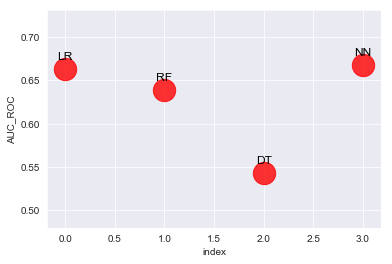

In [22]:
g=sns.regplot(data=model_summary, x="index", y="AUC_ROC", fit_reg=False,
               color="red", scatter_kws={'s':500})

for i in range(0,model_summary.shape[0]):
     g.text(model_summary.loc[i,'index'], model_summary.loc[i,'AUC_ROC']+0.02, model_summary.loc[i,'Name'], 
            horizontalalignment='center',verticalalignment='top', size='large', color='black')

# Interpretations Using

## 1. LIME
## 2. ELI5
## 3. SHAP

In [43]:
test_row = pd.DataFrame(X_test.loc[200,:]).T
test_row

time_in_hospital  num_lab_procedures  num_procedures  number_outpatient  \
200         -1.143423            0.041962       -0.789217          -0.292418   

     number_emergency  number_inpatient  number_diagnoses  \
200         -0.213183         -0.506404          0.817053   

     race_is_AfricanAmerican  race_is_Caucasian  race_is_Unknown  \
200                      0.0                0.0              0.0   

           ...          A1Cresult_is_None  A1Cresult_is_Norm  metformin_is_No  \
200        ...                        1.0                0.0              1.0   

     glipizide_is_No  pioglitazone_is_No  rosiglitazone_is_Steady  \
200              1.0                 1.0                      0.0   

     insulin_is_Down  insulin_is_Steady  change_is_Ch  diabetesMed_is_No  
200              0.0                0.0           0.0                1.0  

[1 rows x 44 columns]

## LIME

In [24]:
#initialization of a explainer from LIME
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns,
                                 class_names=['Readmitted','Not Readmitted'])


In [25]:
exp = explainer.explain_instance(test_row.values[0],
                                 ML_models['LR'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True)

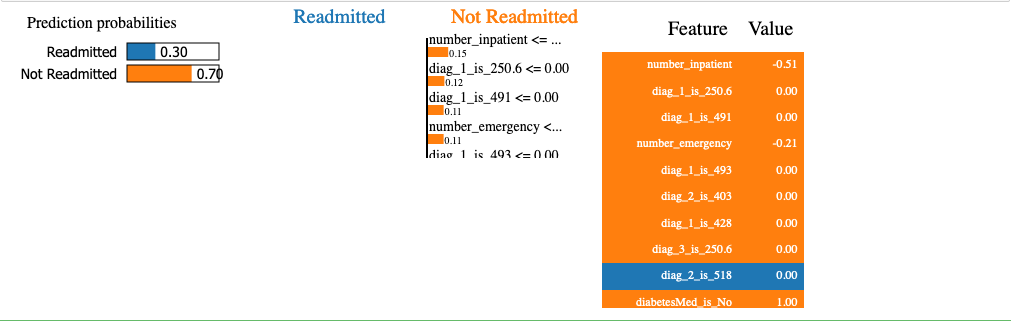

In [26]:
exp = explainer.explain_instance(test_row.values[0],
                                 ML_models['RF'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True)

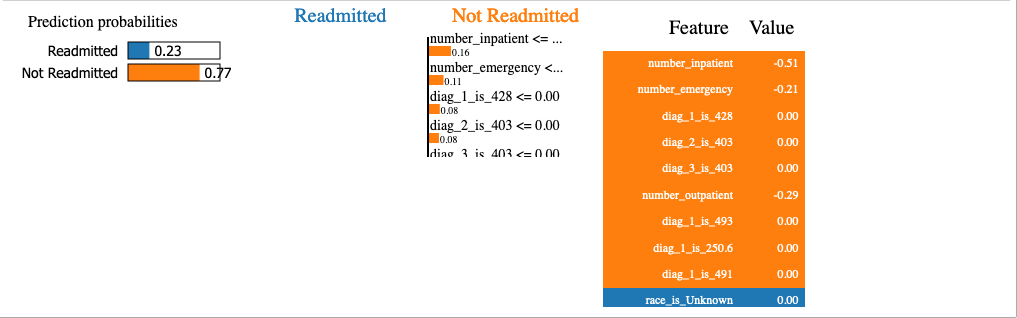

In [27]:
exp = explainer.explain_instance(test_row.values[0],
                                 ML_models['DT'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True)

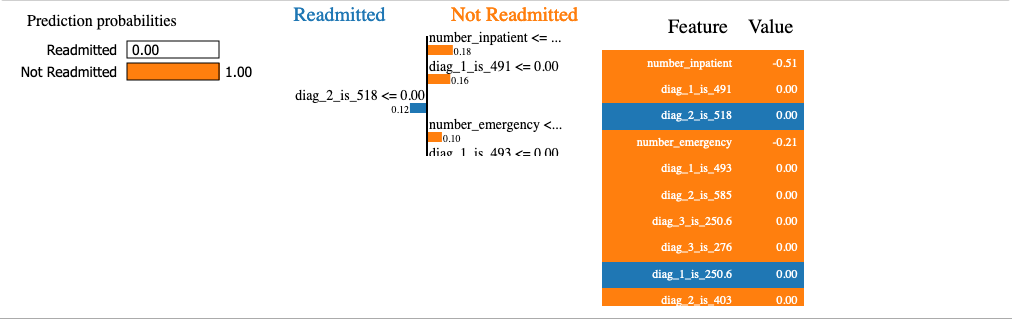

In [28]:
exp = explainer.explain_instance(test_row.values[0],
                                 ML_models['NN'].predict_proba,
                                 num_features=X_train.shape[1])
exp.show_in_notebook(show_table=True)

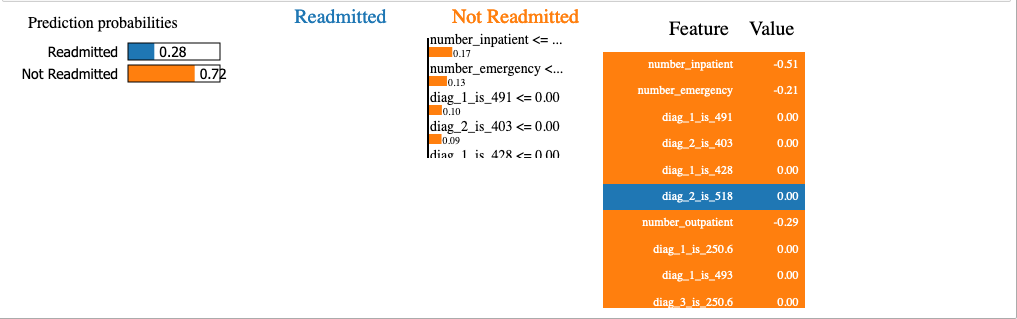 

## ELI5

In [29]:
eli5.show_weights(ML_models['LR'], feature_names = list(X_test.columns),top=None)

In [30]:
eli5.show_prediction(ML_models['LR'], test_row.values[0],feature_names=list(X_test.columns),top=None)

In [31]:
exp = PermutationImportance(ML_models['LR'],
                            random_state = 0).fit(X_test, y_test)
eli5.show_weights(exp,feature_names=list(X_test.columns),top=None)


In [32]:
eli5.show_weights(ML_models['RF'],feature_names=list(X_test.columns),top=None)


In [33]:
eli5.show_prediction(ML_models['RF'], test_row.values[0],feature_names=list(X_test.columns),top=None)

In [34]:
exp = PermutationImportance(ML_models['RF'],
                            random_state = 0).fit(X_test, y_test)
eli5.show_weights(exp,feature_names=list(X_test.columns),top=None)

In [35]:
eli5.show_prediction(ML_models['DT'], test_row.values[0],feature_names=list(X_test.columns),top=None)

In [36]:
eli5.show_prediction(ML_models['NN'], test_row.values[0],feature_names=list(X_test.columns),top=None)

## SHAP

In [37]:
explainer = LinearExplainer(ML_models['LR'], X_train, feature_dependence="independent")
shap_values = explainer.shap_values(test_row.values)
shap.force_plot(explainer.expected_value,
                shap_values,
                test_row.values,
                feature_names=X_test.columns)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


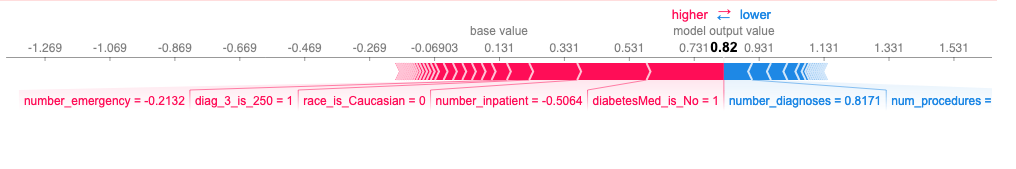

In [38]:
shap_values = explainer.shap_values(X_test.head(250).values)
shap.force_plot(explainer.expected_value,
                shap_values,
                X_test.head(250).values,
                feature_names=X_test.columns)

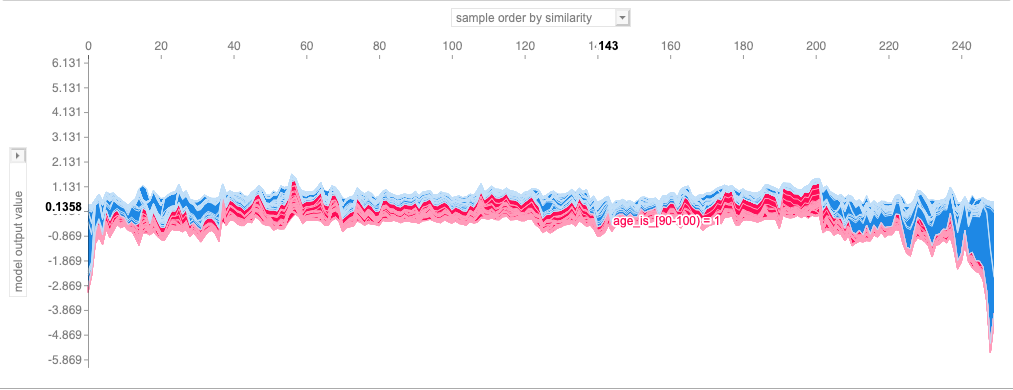

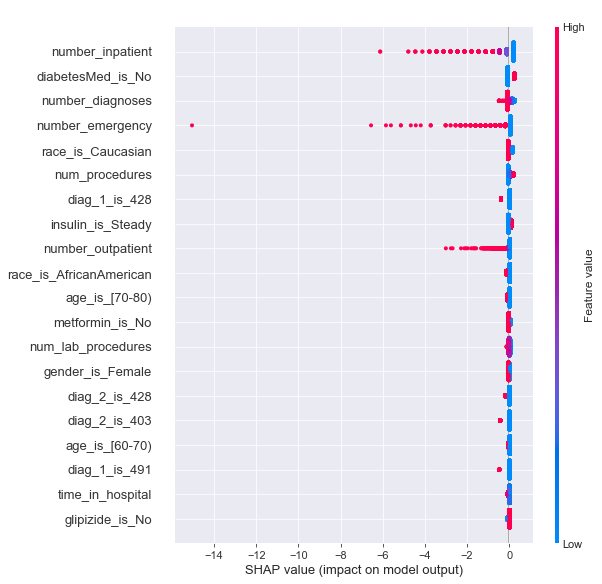

In [39]:
shap_values = explainer.shap_values(X_test.values)
spplot = shap.summary_plot(shap_values, X_test.values, feature_names=X_test.columns)

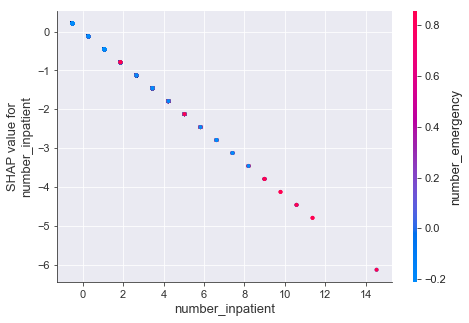

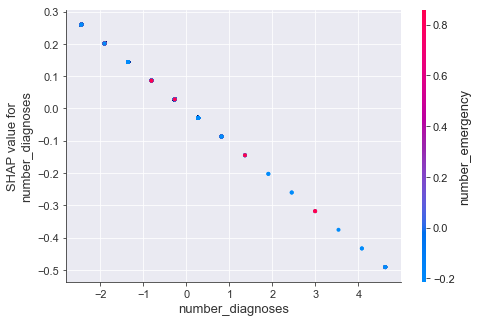

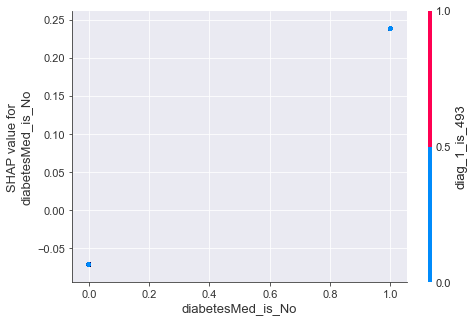

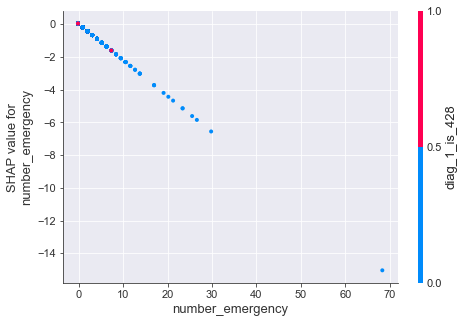

In [40]:
top4_cols = ['number_inpatient','number_diagnoses','diabetesMed_is_No','number_emergency']
for col in top4_cols:
    shap.dependence_plot(col, shap_values, X_test)

In [41]:
explainer = TreeExplainer(ML_models['RF'])
shap_values = explainer.shap_values(test_row.values)
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                test_row.values,
                feature_names=X_test.columns)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


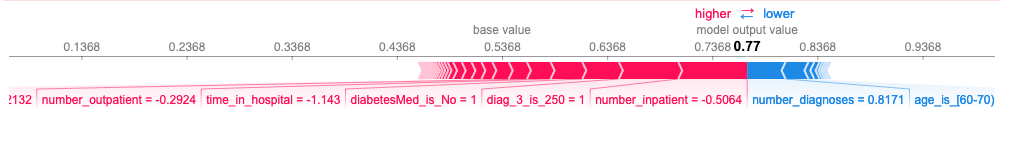

In [42]:
X_train_kmeans = shap.kmeans(X_train, 10)
explainer = KernelExplainer(ML_models['NN'].predict_proba,X_train_kmeans)
shap_values = explainer.shap_values(test_row.values)
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                test_row.values,
                feature_names=X_test.columns)

Widget Javascript not detected.  It may not be installed or enabled properly.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


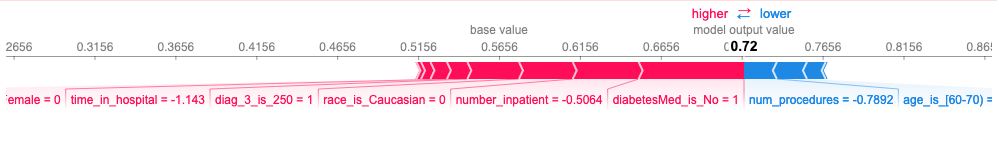